In [1]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import os
import csv
import numpy as np

# Create the CSV Paths
mouse_metadata_path = os.path.join("Data", "Mouse_metadata.csv")
study_results_path = os.path.join("Data", "Study_results.csv")

# Read the CSVs
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine CSVs into a single dataset and display first 5
combined_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Find and drop any duplicate Mouse IDs in the CSV
combined_study_df_cleaned = combined_study_df.drop_duplicates(keep="first")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()

#After resetting the index, drop the new "index" column that was created and display the first 10
combined_study_df_cleaned = combined_study_df_cleaned.drop("index", axis=1)
combined_study_df_cleaned.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Check the total number of unique mice based on "Mouse ID"
total_num_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
total_num_mice

249

In [4]:
# Get the duplicate by Mouse ID that shows up in Mouse ID and Timepoint. 
mouse_duplicates_single = combined_study_df.loc[combined_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates_single

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID. 
mouse_duplicate_g989 = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
mouse_duplicate_g989 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Drop all data for the duplicate Mouse ID and update the cleaned DataFrame
# Note: We're dropping g989 completely given the various data conflicts at the same timepoints, making the data unreliable
combined_study_df_cleaned = combined_study_df_cleaned.set_index("Mouse ID").drop(index="g989")
combined_study_df_cleaned = combined_study_df_cleaned.reset_index()
combined_study_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(combined_study_df_cleaned["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [8]:
# Create summary statistics table (mean, median, variance, standard deviation, and SEM) 
# for the tumor volume for each of the drug regimens
drug_regimen = combined_study_df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_tumor_vol = drug_regimen.mean()
median_tumor_vol = drug_regimen.median()
var_tumor_vol = drug_regimen.var()
std_tumor_vol = drug_regimen.std()
sem_tumor_vol = drug_regimen.sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Vol": mean_tumor_vol, 
                                "Median Tumor Vol": median_tumor_vol, 
                                "Variance of Tumor": var_tumor_vol, 
                                "Standard Dev of Tumor": std_tumor_vol, 
                                "Standard Error of Mean": sem_tumor_vol})
drug_regimen_df


,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor,Standard Dev of Tumor,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Single Line of code: Create summary statistics table (mean, median, variance, standard deviation, and SEM) 
# for the tumor volume for each of the drug regimens

sing_drug_reg = combined_study_df_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
sing_drug_reg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

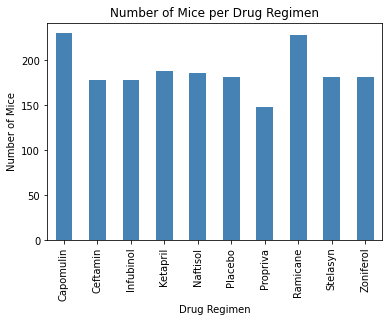

<Figure size 432x288 with 0 Axes>

In [10]:
# Pandas Bar Chart

# Find total number of unique mice tested on each drug regimen
mice_by_drug = combined_study_df_cleaned.groupby("Drug Regimen")["Mouse ID"].count()

# Create the Pandas Bar Chart and set the color
mice_by_drug_bar = mice_by_drug.plot(kind="bar", color="steelblue")

# Set the y-label and the title
mice_by_drug_bar.set_ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

# Display
plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_name = combined_study_df_cleaned["Drug Regimen"].unique()
drug_x_axis = np.arange(len(drug_name))
drug_xticks = [name for name in drug_x_axis]
plt.xticks(drug_xticks, drug_name, rotation="vertical")
plt.title("Number of Mice per Drug Regiment")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")
plt.bar(drug_x_axis, mice_by_drug)
plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice = combined_study_df_cleaned.groupby("Sex")["Mouse ID"].count()
explode = [0.1, 0]
mice.plot(kind="pie", explode=explode, autopct="%5.2f%%", shadow=True)
plt.title("Count of Mice by Gender")
plt.show()
plt.tight_layout()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_count = combined_study_df_cleaned.groupby("Sex")["Mouse ID"].count()
female_count = combined_study_df_cleaned.loc[combined_study_df_cleaned["Sex"] == "Female"].count()["Mouse ID"]
male_count = combined_study_df_cleaned.loc[combined_study_df_cleaned["Sex"] == "Male"].count()["Mouse ID"]
plt.ylabel("Gender")
plt.pie([female_count, male_count], explode=explode, autopct="%1.2f%%", labels=["Female", "Male"], shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
tumor_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
timepoint_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Timepoint"]
drug_regimen_last = combined_study_df_cleaned.groupby("Mouse ID").last()["Drug Regimen"]

drug_reg_dictionary = {"Timepoint": timepoint_last, 
                       "Tumor Volume (mm3)": tumor_last, 
                       "Drug Regimen": drug_regimen_last}

quartiles_df = pd.DataFrame(drug_reg_dictionary)

quartiles_df = quartiles_df.loc[quartiles_df["Drug Regimen"].isin(drug_names)]
quartiles_df

In [ ]:
red_square = dict(markerfacecolor='r', marker='s')
quartiles_df.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", flierprops=red_square).set_title("")

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
for drug in drug_names: 
    new_drug_df = quartiles_df.loc[quartiles_df["Drug Regimen"] == drug]
    tumor_vol_new = new_drug_df["Tumor Volume (mm3)"]
    quartiles = tumor_vol_new.quantile([.25, .5, .75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_q_range = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * inter_q_range)
    upper_bound = upper_quartile + (1.5 * inter_q_range)
    outliers = tumor_vol_new.loc[(tumor_vol_new > upper_bound) | (tumor_vol_new < lower_bound)].unique()
    plt.tight_layout
    print(f"{drug} \n"
          f"    Lower Quartile: {lower_quartile}\n"
          f"    Upper-quartile: {upper_quartile}\n"
          f"    Inter-Quartile Range: {inter_q_range}\n"
          f"    Lower-Bound: {lower_bound}\n"
          f"    Upper-Bound: {upper_bound}\n"
          f"    Outlier(s): {outliers}")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_example = combined_study_df_cleaned.loc[(combined_study_df_cleaned["Drug Regimen"] == "Capomulin") & (combined_study_df_cleaned["Mouse ID"]=="b128")][["Tumor Volume (mm3)", "Timepoint"]]
capomulin_example = capomulin_example.set_index("Timepoint")
capomulin_graph = capomulin_example.plot()
capomulin_graph.set_xlabel("Timepoint")
capomulin_graph.set_ylabel("Tumor Size")
capomulin_graph.set_title("Tumor Size for Mouse b128 Over Time")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vs_weight = combined_study_df_cleaned.loc[combined_study_df_cleaned["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

tumor_vs_weight_last = tumor_vs_weight.groupby("Mouse ID").last()[["Tumor Volume (mm3)", "Weight (g)"]]
tumor_vs_weight_last.plot("Weight (g)","Tumor Volume (mm3)", kind="scatter")
plt.title("Tumor Size vs. Mouse Weight")
plt.show()
plt.tight_layout

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
new_tumor_weight = tumor_vs_weight_last.reset_index()
tumor_size = new_tumor_weight.iloc[:, 1]
mouse_weight = new_tumor_weight.iloc[:, 2]
correlation = sts.pearsonr(mouse_weight, tumor_size)
correlation[0]
r_squared = correlation[0] ** 2
r_squared

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_size)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_size)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.show()
print(f"The correlation is {correlation[0]}")
print(f"And the r-squared is {r_squared}")